In [39]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from IPython.display import SVG
#from graphviz import Source
import graphviz
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'

In [8]:
titanic_data = pd.read_csv("train.csv")

In [9]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [11]:
# chech are there null in DF
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
X = titanic_data.drop(['PassengerId', 'Survived','Name', 'Ticket', 'Cabin'], axis = 1)
Y = titanic_data.Survived
X.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S

In [26]:
# Convert string data to number. Fro instence, male and female into 0 and 1
X = pd.get_dummies(X)
X.head()

Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [30]:
# There are empties in data. So we must to put some variables or delet it
X = X.fillna({'Age': X.Age.median()})
# No empty place. We put median in each age cell
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [98]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [49]:
X_train.shape

(596, 10)

In [48]:
X_test.shape

(295, 10)

In [51]:
clf.fit(X, Y)
clf.score(X, Y)

0.9797979797979798

In [55]:
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9798657718120806
0.7661016949152543


In [60]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [61]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [62]:
clf.score(X_train, y_train)

0.8338926174496645

In [63]:
clf.score(X_test, y_test)

0.823728813559322

In [131]:
max_depth_values = range(1, 100)
score_data = pd.DataFrame()

In [132]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()       
    temp_score_data = pd.DataFrame({"max_depth":[max_depth], "train_score":[train_score], "test_score":[test_score],
                                   "cross_val_score":[mean_cross_val_score]})
    score_data = score_data.append(temp_score_data)

In [119]:
score_data_long = pd.melt(score_data, id_vars = ["max_depth"],
                         value_vars = ['train_score', 'test_score'],
                         var_name = "set_type",
                         value_name = "score")

In [87]:
print(score_data_long.head(10))

   max_depth     set_type     score
0          1  train_score  0.781879
1          2  train_score  0.805369
2          3  train_score  0.823826
3          4  train_score  0.833893
4          5  train_score  0.840604
5          6  train_score  0.867450
6          7  train_score  0.882550
7          8  train_score  0.909396
8          9  train_score  0.917785
9         10  train_score  0.926174


# Визуализация данных

<AxesSubplot:xlabel='max_depth', ylabel='score'>

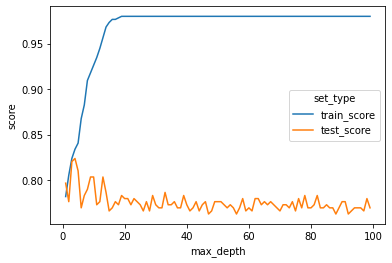

In [88]:
sns.lineplot(x = "max_depth", y = "score", hue = "set_type", data = score_data_long)

# Кроссвалидация

In [97]:
from sklearn.model_selection import cross_val_score

In [102]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
cross_val_score(clf, X_train, y_train, cv = 5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])